In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv("abalone.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# 1.Visualization

# 1.1 Univariate analysis

(array([632., 783., 827., 824., 616., 286., 129.,  58.,  16.,   6.]),
 array([2.00000e-03, 2.84350e-01, 5.66700e-01, 8.49050e-01, 1.13140e+00,
        1.41375e+00, 1.69610e+00, 1.97845e+00, 2.26080e+00, 2.54315e+00,
        2.82550e+00]),
 <BarContainer object of 10 artists>)

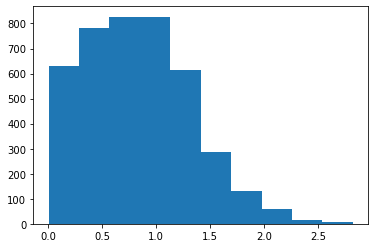

In [4]:
plt.hist(df["Whole weight"])

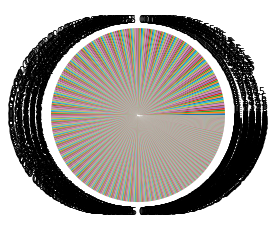

In [5]:
plt.pie(df["Viscera weight"].value_counts(),labels=df["Viscera weight"].unique())
plt.show()

# 1.2 Bi-variate analysis

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

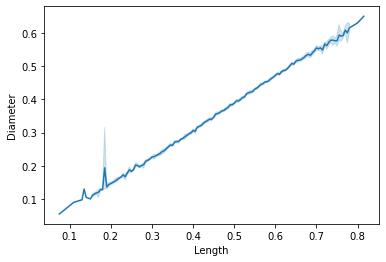

In [6]:
sns.lineplot(x=df.Length,y=df.Diameter)

<BarContainer object of 4177 artists>

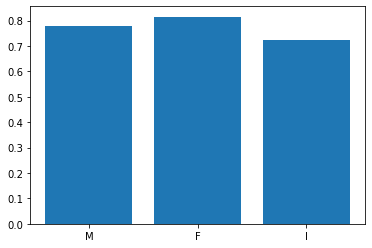

In [7]:
plt.bar(df.Sex,df.Length)

# 1.3 Multi-variate analysis 

<AxesSubplot:>

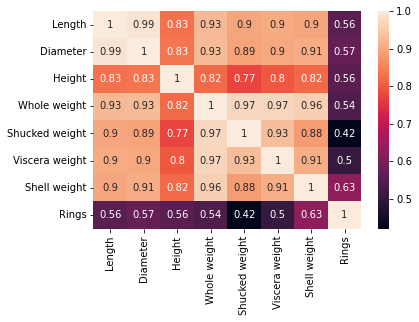

In [8]:
sns.heatmap(df.corr(),annot=True)

# 2.Perform descriptive statistics on the dataset

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# 3.Handle missing values 

In [10]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

# 4.Find the outliers and replace the outliers

<AxesSubplot:xlabel='Rings'>

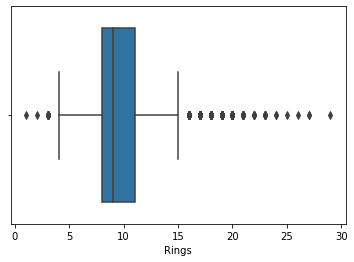

In [11]:
sns.boxplot(x=df["Rings"])

In [12]:
q1=df.Length.quantile(0.25)
q2=df.Length.quantile(0.75)
IQR = q2-q1
upper_limit = q2+1.5*IQR
lower_limit = q2-1.5*IQR
print(upper_limit)
print(lower_limit)
df["Length"].head()

0.8624999999999999
0.36750000000000005


0    0.455
1    0.350
2    0.530
3    0.440
4    0.330
Name: Length, dtype: float64

In [13]:
df.median()

C:\Users\Hema\AppData\Local\Temp\ipykernel_8400\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [14]:
df["Length"]=np.where(df["Length"]<lower_limit,6.52,df["Length"])

<AxesSubplot:xlabel='Length'>

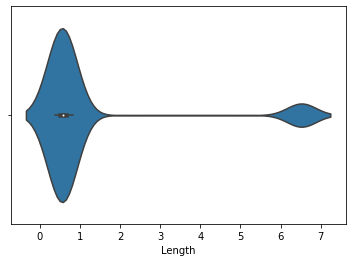

In [15]:
df["Length"]=np.where(df["Length"]<lower_limit,6.52,df["Length"])
sns.violinplot(x=df["Length"])

# 5.Check for Categorical columns and perform encoding.

In [16]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,6.520,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,6.520,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)

In [18]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,6.520,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,6.520,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 6.Split the data

In [19]:
y=df["Rings"]
x=df.drop("Rings",axis=1)

In [20]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,6.520,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,6.520,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# 7.Scale the independent variable

In [21]:
scaled_x=pd.DataFrame(scale(x),columns=x.columns)
scaled_x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.411890,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,2.772531,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,-0.372511,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.419766,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,2.772531,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,-1.280690,-0.354135,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,1.151980,-0.341008,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,1.151980,-0.335758,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,-1.280690,-0.322632,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


# 8.Split the data into training and testing

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.3,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [23]:
xtrain

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1376,1.151980,-0.325257,1.029133,0.848442,0.923373,0.955826,0.528338,1.086094
1225,-0.064355,2.772531,-1.540707,-1.303532,-1.281263,-1.146128,-1.310147,-1.356680
2722,-0.064355,-0.453894,-1.339151,-1.064424,-1.222119,-1.191186,-1.150477,-1.241726
3387,1.151980,-0.364636,0.021352,0.131117,0.090261,-0.251727,0.140568,0.511324
2773,-1.280690,-0.346259,0.575631,0.131117,0.321738,0.498488,0.318486,0.080246
...,...,...,...,...,...,...,...,...
1033,1.151980,-0.309505,1.180300,1.087551,1.617803,1.374865,1.294753,1.711157
3264,-1.280690,-0.306880,0.928354,0.011563,0.696995,0.816146,1.249133,0.331708
1653,1.151980,-0.338383,0.424464,0.131117,0.265653,0.466947,0.236370,0.105392
2607,-1.280690,-0.322632,0.827576,0.609334,0.608279,0.530028,0.510090,0.572393


In [24]:
xtest

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
668,1.151980,-0.362010,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940
1580,-0.064355,-0.388263,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685
3784,1.151980,-0.325257,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209
463,-0.064355,2.772531,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219
2615,1.151980,-0.312131,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287
...,...,...,...,...,...,...,...,...
1052,1.151980,-0.249125,1.936135,1.924430,3.004623,2.918100,2.996378,2.742152
3439,-0.064355,-0.419766,-0.583316,-0.347099,-0.760186,-0.673019,-0.776394,-0.774725
1174,-1.280690,-0.317381,0.877965,-2.977291,0.668443,0.685478,1.162455,0.356854
2210,1.151980,-0.304255,0.978743,1.446213,1.635138,0.572833,1.062091,2.666713


In [25]:
ytrain

1376    10
1225     5
2722     7
3387    18
2773    11
        ..
1033    10
3264    12
1653    10
2607     9
2732     8
Name: Rings, Length: 2923, dtype: int64

In [26]:
ytest

668     13
1580     8
3784    11
463      5
2615    12
        ..
1052    12
3439     8
1174     9
2210    18
2408    15
Name: Rings, Length: 1254, dtype: int64

# 9. Build the Model


In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
model = linear_model.LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [29]:
Y_pred_train = model.predict(xtrain)

In [32]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(ytrain, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(ytrain, Y_pred_train))

Coefficients: [ 0.06815161 -0.23562734  0.86178154  0.3092917   4.63014369 -4.50274278
 -1.04170943  1.38824653]
Intercept: 9.915811102632894
Mean squared error (MSE): 4.80
Coefficient of determination (R^2): 0.54


In [33]:
Y_pred_test = model.predict(xtest)

In [34]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(ytest, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(ytest, Y_pred_test))

Coefficients: [ 0.06815161 -0.23562734  0.86178154  0.3092917   4.63014369 -4.50274278
 -1.04170943  1.38824653]
Intercept: 9.915811102632894
Mean squared error (MSE): 5.10
Coefficient of determination (R^2): 0.52
